# SI 618 Day 02 - Pandas I
Dr. Chris Teplovs, University of Michigan School of Information

Copyright &copy; 2024.  This notebook may not be shared outside of the course without permission.

Notebook version 2024.09.05.7.CT

## Overview

This notebook will provide an overview of some pandas data structures and introduce you to pandas, a Python library for data analysis.  We will use pandas extensively in this course.


## Outline
1. Welcome (5 minutes)
2. Q&A (15 minutes)
3. Coding basics (python stuff) (30 minutes)
4. Conceptual overview & lecture (50 minutes)
5. Break (10 minutes)
6. Hands-on coding (25 minutes)
7. Application of concepts (30 minutes)
8. Debrief & next steps (10 minutes)


## Welcome (5 minutes)

## Q&A (15 minutes)

Your questions, comments, and observations about the pre-class readings.

My questions:
1. Why are we using Python?  Why not R?  Or SAS?  Or SPSS?  Or Stata?  Or Excel?
2. Why are we using Jupyter notebooks?  Why not just write scripts?
3. What is pandas?  Why are we using it?  Why not just use Python?

## Coding basics (python stuff) (30 minutes)

Before we start, let's look at some Visual Studio Code extensions that will make our lives easier.

1. Python
2. Jupyter
3. GitHub Copilot
4. Markdown All in One
5. Code Spell Checker
6. GitLens
7. indent-rainbow
8. Pylance
9.  Rainbow CSV
10. Trailing Spaces

### Data structures in python

You've already been introduced to the basic data structures in python: lists, tuples, and dictionaries.  We'll review them briefly here.

Python lists are ordered collections of items.  The items can be of any type, and can be mixed types.  Lists are mutable, meaning that you can change the contents of a list after you create it.  You can add items to a list, remove items from a list, and change the value of items in a list.  You can also sort a list.

```
my_list = [1, 2, 3, 4, 5]
my_list.append(6) # add an item to the end of the list
my_list[0] = 0 # change the value of the first item in the list
my_list[1] = 'two' # lists can contain mixed types
```

A tuple is similar to a list, but is immutable.  Once you create a tuple, you cannot change its contents.  You can, however, create a new tuple from an existing tuple.

```
my_tuple = (1, 2, 3, 4, 5)
my_tuple[0] = 0 # this will cause an error
my_tuple = (0, 2, 3, 4, 5) # this is ok
```

A dictionary is a collection of key-value pairs.  The keys must be unique, but the values can be duplicated.  Dictionaries are mutable.

```
my_dict = {'a': 1, 'b': 2, 'c': 3}
my_dict['d'] = 4 # add a new key-value pair
my_dict['a'] = 0 # change the value of an existing key
my_dict['a'] = my_dict['a'] + 1 # increment the value of an existing key
my_dict['e'] = my_dict['e'] + 1 # error: key 'e' does not exist
```

Let's introduce a new data structure: the set.  A set is an unordered collection of unique items.  You can add items to a set, remove items from a set, and check whether an item is in a set.  You cannot change the value of an item in a set.

```
my_set = {1, 2, 3, 4, 5}
my_set.add(6) # add an item to the set
my_set.add(6) # this is ok, but the set will still only contain one 6
my_set.remove(1) # remove an item from the set
my_set[0] = 0 # this will cause an error
```



We can combine data types into more complex ones.  For example, we could have a list of lists, or a dictionary of sets, or a list of tuples of dictionaries of sets.  You get the idea.

```
my_list = [1, 2, 3, 4, 5]
my_list_of_lists = [my_list, my_list, my_list]

my_set = {1, 2, 3, 4, 5}
my_dict_of_sets = {'a': my_set, 'b': my_set, 'c': my_set}

my_tuple = (my_dict_of_sets, my_dict_of_sets, my_dict_of_sets)
my_list_of_tuples = [my_tuple, my_tuple, my_tuple]

```

#### Challenge:

Consider the following code:

In [90]:
names = ['Chris', 'Xin', 'Nithin']
scores = [75, 95, 85]

Write code to print the following output.  Document your code using comments, docstrings, and type hints.

```
Chris: 75
Xin: 95
Nithin: 85
```

In [91]:
def print_scores(names:list, scores:list) -> None:
    '''
    This function takes in two lists, names and scores, and prints out the names and scores in the format of name: score
    '''
    for i in range(len(names)): # iterate through the length of the names list
        print(f"{names[i]}: {scores[i]}")  # print out the name and score at the index i

print_scores(names, scores) # call the function with the names and scores lists

Chris: 75
Xin: 95
Nithin: 85


#### Challenge:
Now consider the case where we have multiple scores per person.  Write code to use an appropriate data structure to store the scores for each person and print the following, exactly as it appears below.  Document your code using comments, docstrings, and type hints.

```
Chris: 75, 80, 85
Xin: 95, 90, 85
Nithin: 85, 90, 95
```

In [92]:
scores = [[75, 80, 85], [95, 90, 85], [85, 90, 95]]

In [93]:
def print_scores(names:list, scores:list) -> None:
    '''
    This function takes in two lists, names and scores, and prints out the names and scores in the format of name: score
    '''
    for i in range(len(names)): # iterate through the length of the names list
        print(f"{names[i]}: {', '.join(map(str, scores[i]))}")  # print out the name and score at the index i

print_scores(names, scores) # call the function with the names and scores lists

Chris: 75, 80, 85
Xin: 95, 90, 85
Nithin: 85, 90, 95


## Conceptual overview & lecture (50 minutes)

Whereas [PEP-8](https://pep8.org/) suggests that `import` statements should be at the top of the file, we're going to put them here so that we can see what we're importing.

In [94]:
import pandas as pd
import numpy as np

Before we dive into `pandas`, let's take a look at some `numpy` basics.

numpy is a Python library for scientific computing.  Most relevant to us, it provides a multidimensional array object, and an assortment of routines for fast operations on arrays.  The array object is called a `ndarray` and is similar to a list, but all of the elements must be of the same type.  The elements of an `ndarray` are accessed using square brackets, just like a list.

https://numpy.org/doc/stable/user/quickstart.html

https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html



Let's create a small dataframe to play with.

In [95]:
df = pd.DataFrame({'foo': [1, 2, 3], 'bar': [4, 5, 6]})
df

,foo,bar
0,1,4
1,2,5
2,3,6


Creating small DataFrames is a good practice when you're testing things out, but it can get a bit cumbersome if we want a slightly larger DataFrame.  So let's generate some random data using `numpy` and then create a DataFrame from that.

In [96]:
# np.random.randn returns a sample (or samples) from the “standard normal” distribution.
np.random.randn(10, 4)

array([[ 0.70775194, -0.56246678,  0.63240774,  0.97255445],
       [ 0.62180996, -1.57022472, -0.72713718, -0.24751864],
       [-0.07443343,  0.6206721 ,  0.177701  , -1.33534436],
       [ 0.38019785,  0.61058575,  0.55979045,  1.08078073],
       [ 0.83392215,  0.45918008, -0.07016571, -1.66096093],
       [ 0.42961822,  0.20768769,  0.27157884, -1.27674858],
       [-1.08105654,  1.05315285, -0.03955515,  0.6815007 ],
       [ 0.02831838,  0.02975614,  0.93828381, -0.51604473],
       [ 0.09612078, -0.46227529, -0.43449623, -0.30917212],
       [ 0.22213377, -0.47874862,  1.25575613, -0.8946073 ]])

In [97]:
# we can use it to create a DataFrame with a random values
pd.DataFrame(np.random.randn(10, 4))

,0,1,2,3
0,-0.186872,-0.439731,1.446978,0.196555
1,1.031845,-1.485560,0.267050,0.889631
2,0.082284,1.065480,-0.517288,1.409347
3,2.298898,-0.362839,-0.445503,1.453384
4,1.579572,-0.522860,-0.420187,-0.281785
5,-1.344451,-0.918652,-1.004141,-0.767798
6,-0.034685,0.234215,1.550500,-0.998354
7,0.984322,-0.213989,-0.049464,0.674819
8,-1.122722,0.382410,0.166452,0.492451
9,0.289169,2.455300,-0.637740,-0.530997


But those column names don't make much sense.  Let's change them.

In [98]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.623141,-0.555477,-0.637387,1.189017
1,1.420504,-0.570746,-0.832356,0.471416
2,-0.552223,0.632932,0.202923,-1.515744
3,1.547505,1.795878,-0.612789,-0.387702
4,0.285865,0.334457,0.658544,2.010205
5,-0.176947,-0.798297,-1.379319,-0.730930
6,-0.033127,1.794558,-0.517611,0.223788
7,-0.016423,1.188393,2.526932,-0.530869
8,-0.489439,1.044161,0.681891,1.846707
9,0.583928,-0.359292,0.590655,1.108704


If you re-run the above cell, you'll get different values.  That's because we're using `numpy.random` to generate random values.  If we want to be able to reproduce our results, we need to set the seed for the (pseudo-)random number generator.

What does setting the seed do? It sets the starting point for the random number generator.  The random number generator is a mathematical function that takes a number as input and produces a random number as output.  If you set the seed to the same value, you'll get the same sequence of random numbers.  If you set the seed to a different value, you'll get a different sequence of random numbers.

With numpy, you can set the seed using `numpy.random.seed()`.  The argument to `numpy.random.seed()` is the seed value.  The seed value can be any integer.  It doesn't matter what the value is, as long as it's an integer.  Common values are 0, 1, 42, and 618 (for this course).  



In [99]:
np.random.seed(618)
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.114814,0.501551,-0.708472,0.446456
1,0.169825,0.565925,-2.232266,0.141151
2,0.572791,-0.758860,1.074469,-0.268924
3,0.055883,0.029417,-0.307717,0.333990
4,0.613102,-0.950171,-0.790737,-0.722889
5,0.324066,1.426340,0.632387,0.212093
6,-0.428327,0.093400,0.363782,-0.440865
7,0.353589,0.175615,-1.036438,-0.020505
8,0.771652,-1.087879,-0.767269,-0.653891
9,-1.323030,1.507597,0.613142,2.989599


#### Challenge:

Implement a function that takes the number of rows, number of columns, and column names as required parameters, as well as a random seed that defaults to 42, and returns a DataFrame with random data.  Document your function using a docstring, comments, and type hints.

In [100]:
def create_random_df(nrows:int, ncols:int, colnames:list, seed:int=42) -> pd.DataFrame:
    '''
    This function creates a random DataFrame with nrows, ncols. The function also takes in colnames and the random seed as arguments. 
    Random seed is set to 42 by default.
    '''
    np.random.seed(seed) # set the seed 
    return pd.DataFrame(np.random.randn(nrows, ncols), columns=colnames) # return a DataFrame with random values

create_random_df(10, 4, ['A', 'B', 'C', 'D'])

,A,B,C,D
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730
3,0.241962,-1.913280,-1.724918,-0.562288
4,-1.012831,0.314247,-0.908024,-1.412304
5,1.465649,-0.225776,0.067528,-1.424748
6,-0.544383,0.110923,-1.150994,0.375698
7,-0.600639,-0.291694,-0.601707,1.852278
8,-0.013497,-1.057711,0.822545,-1.220844
9,0.208864,-1.959670,-1.328186,0.196861


#### Challenge: 

Write a set of assertions that test your function.  You should test that the function returns a DataFrame, that the DataFrame has the correct number of rows and columns, and that the column names are correct.

In [101]:
# set of assertions to test the function
assert type(create_random_df(10, 4, ['A', 'B', 'C', 'D'])) == pd.DataFrame # check the type of DataFrame
assert create_random_df(10, 4, ['A', 'B', 'C', 'D']).shape == (10, 4) # check the shape of DataFrame
assert create_random_df(10, 4, ['A', 'B', 'C', 'D']).columns.tolist() == ['A', 'B', 'C', 'D'] # check the columns of DataFrame

### Universal functions (ufuncs) from numpy

Let's say we had a simple list of numbers and we wanted to add 1 to each number.  We could do that using a for loop:
```
def add_one(numbers):
    for i in range(len(numbers)):
        numbers[i] += 1
    return numbers

add_one([1, 2, 3, 4, 5])
```

But that's cumbersome, and annoying.  It would be nice if we could just add 1 to the list and have it add 1 to each element.  We can do that with numpy.

```
import numpy as np
numbers = np.array([1, 2, 3, 4, 5])
numbers + 1
```

Numpy provides us not only with universal functions for arithmetic, but also for trigonometry, logarithms, and other mathematical functions.  For example, we can take the square root of each element in an array using `np.sqrt()`.

```
np.sqrt(numbers)
```

That's enough numpy for now.  Let's move on to pandas.  pandas is a Python library for data analysis.  It provides a DataFrame object that is similar to a spreadsheet or a database table.  It also provides a Series object that is similar to a single column in a spreadsheet or a database table.  Let's take a look at pandas Series objects and then move on to pandas DataFrame objects.

### pandas.Series

pandas Series are similar to numpy arrays, but they have an index.  The index is a label for each element in the Series.  The index can be a number, a string, or a date.  The index is used to access elements in the Series.  The index is also used to align Series when performing operations on multiple Series.

So, for example, we can create a Series from a list of numbers.  Unless we specify otherwise, the index will be a sequence of integers starting at 0 (called a RangeIndex):

```
import pandas as pd
numbers = pd.Series([1, 2, 3, 4, 5])
numbers
```


In [102]:
import pandas as pd
numbers = pd.Series([1, 2, 3, 4, 5])
numbers

0    1
1    2
2    3
3    4
4    5
dtype: int64

### pandas.DataFrame

pandas DataFrames consist of one or more Series.  Each Series is a column in the DataFrame.  The Series are aligned using the index.  So, for example, we can create a DataFrame from a dictionary of Series.  The keys of the dictionary are the column names.  The values of the dictionary are the Series.

```
df = pd.DataFrame({'numbers': numbers, 'squares': numbers ** 2})
df
```


We can extract a single column from a DataFrame using square brackets.  The column will be returned as a Series.

```
df['numbers']
```

We can also extract a single column from a DataFrame using dot notation.  The column will be returned as a Series.

```
df.numbers
```
Be careful with dot notation.  It only works if the column name is a valid Python identifier.  That means it can't start with a number, it can't contain spaces, and it can't contain any of the following characters: `~!@#$%^&*()-+={}[]|\:;"'<,>.?/`.  If the column name is not a valid Python identifier, or if it conflicts with any DataFrame method or attribute names, you must use square brackets.



We can perform arithmetic operations on Series, just like we can with numpy arrays.  We can also perform arithmetic operations on DataFrames.  The operations are performed on each element in the Series or DataFrame.

```
df + 1
```


Let's say we wanted to add a new column to our DataFrame.  We can do that using square brackets and the assignment operator.  The new column will be added to the end of the DataFrame.

```
df['cubes'] = numbers ** 3
df
```

We can also use more complex expressions to create new columns.  For example, we can create a new column that is the sum of two existing columns.

```
df['sum'] = df.numbers + df.squares
df
```

We can also use more complex functions on DataFrames.  For example, we can use the `map()` method to apply a function to each element in a DataFrame.

```
def is_even(x):
    return x % 2 == 0
df['numbers'].map(is_even)
```

For those who are comfortable with lambda functions, we can use a lambda function instead of a named function.

```
df['numbers'].map(lambda x: x % 2 == 0)
```

Sometimes we want to apply a function to each element in a DataFrame, but we want to use more than one column as input to the function.  We can do that using the `apply()` method.  The `apply()` method takes a function as an argument.  The function must take a single argument, which will be a Series containing the values from a single row in the DataFrame.  The function must return a single value, which will be the value for the new column.

```
df.apply(max, axis=1) # how does this work?
```

Note that, while less common than row-wise manipulation, we can use also the `apply()` method to apply a function to each column in a DataFrame.  We just need to specify `axis=0` (or `axis='index'`).

```
def range(x):
    return x.max() - x.min()
df.apply(range, axis=0)
```

### Counting value frequencies

Let's say we wanted to count the number of times each value appears in a Series.  We can do that using the `value_counts()` method.

```
df = pd.DataFrame({'numbers': [1, 2, 3, 4, 5, 5, 1, 2, 3, 4, 5, 6], 'squares': [1, 4, 9, 16, 25, 25, 1, 4, 9, 16, 25, 36], 'names': ['one', 'two', 'three', 'four', 'five', 'five', 'one', 'two', 'three', 'four', 'five', 'six']})
df.numbers.value_counts()
```

Note that the `value_counts()` method returns a Series, not a DataFrame.  The index of the Series is the unique values in the original Series.  The values of the Series are the counts of each unique value.  The Series is sorted in descending order by count.

In [103]:
df = pd.DataFrame({'numbers': [1, 2, 3, 4, 5, 5, 1, 2, 3, 4, 5, 6], 'squares': [1, 4, 9, 16, 25, 25, 1, 4, 9, 16, 25, 36], 'names': ['one', 'two', 'three', 'four', 'five', 'five', 'one', 'two', 'three', 'four', 'five', 'six']})
df.numbers.value_counts()

numbers
5    3
1    2
2    2
3    2
4    2
6    1
Name: count, dtype: int64

### Describing DataFrames

Let's say we wanted to get some basic descriptive statistics for each column in a DataFrame.  We can do that using the `describe()` method.

```
df.describe()
```

We can also get information about the data types of each column in a DataFrame using the `info()` method.

```
df.info()
```

In [104]:
df.describe()


,numbers,squares
count,12.000000,12.000000
mean,3.416667,14.250000
std,1.676486,11.450486
min,1.000000,1.000000
25%,2.000000,4.000000
50%,3.500000,12.500000
75%,5.000000,25.000000
max,6.000000,36.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   numbers  12 non-null     int64 
 1   squares  12 non-null     int64 
 2   names    12 non-null     object
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


The `dtypes` attribute of a DataFrame contains the data types of each column in the DataFrame.

```
df.dtypes
```

You can extract all columns of a particular data type using the `select_dtypes()` method, either by specifying the data type you want to include or by specifying the data type you want to exclude.

```
df.select_dtypes(include='number')
```

```
df.select_dtypes(include='object')
```

```
df.select_dtypes(exclude='number')
```

### Dropping rows and columns

Let's say we wanted to drop the `numbers` column from our DataFrame.  We can do that using the `drop()` method.

```
df.drop('numbers', axis=1)
```

Note that the `drop()` method returns a new DataFrame.  It does not modify the original DataFrame.  If we want to modify the original DataFrame, we need to use the `inplace=True` argument.

```
df.drop('numbers', axis=1, inplace=True)
```

We can also drop rows using the `drop()` method.  To drop rows, we need to specify the index of the rows we want to drop.

```
df.drop(['one', 'two'], axis=0)
```

### Missing values

* a missing value is just that -- it's missing
* represented as nan, NaN, NAN, np.nan, np.NaN (you get the idea)
* many tools that we'll be learning can't handle missing values
* you need to decide what to do with it
* can leave it as is, replace it with a scalar value, replace it with the output of a function (like mean), or drop the row
* think of what that would mean if you were going to calculate the mean of 1,2,3,NaN,4,5,6

Let's set up a DataFrame with some missing values.

In [106]:
df_missing = pd.DataFrame(
    {'a': [1, 2, 3, np.nan],
    'b': [2, 3, np.nan, 5],
    'c': [1, 2, 3, 4]})

In [107]:
df_missing

,a,b,c
0,1.0,2.0,1
1,2.0,3.0,2
2,3.0,NaN,3
3,NaN,5.0,4


In [108]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3 non-null      float64
 1   b       3 non-null      float64
 2   c       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes


The `missingno` library provides some nice tools for visualizing missing values.

<Axes: >

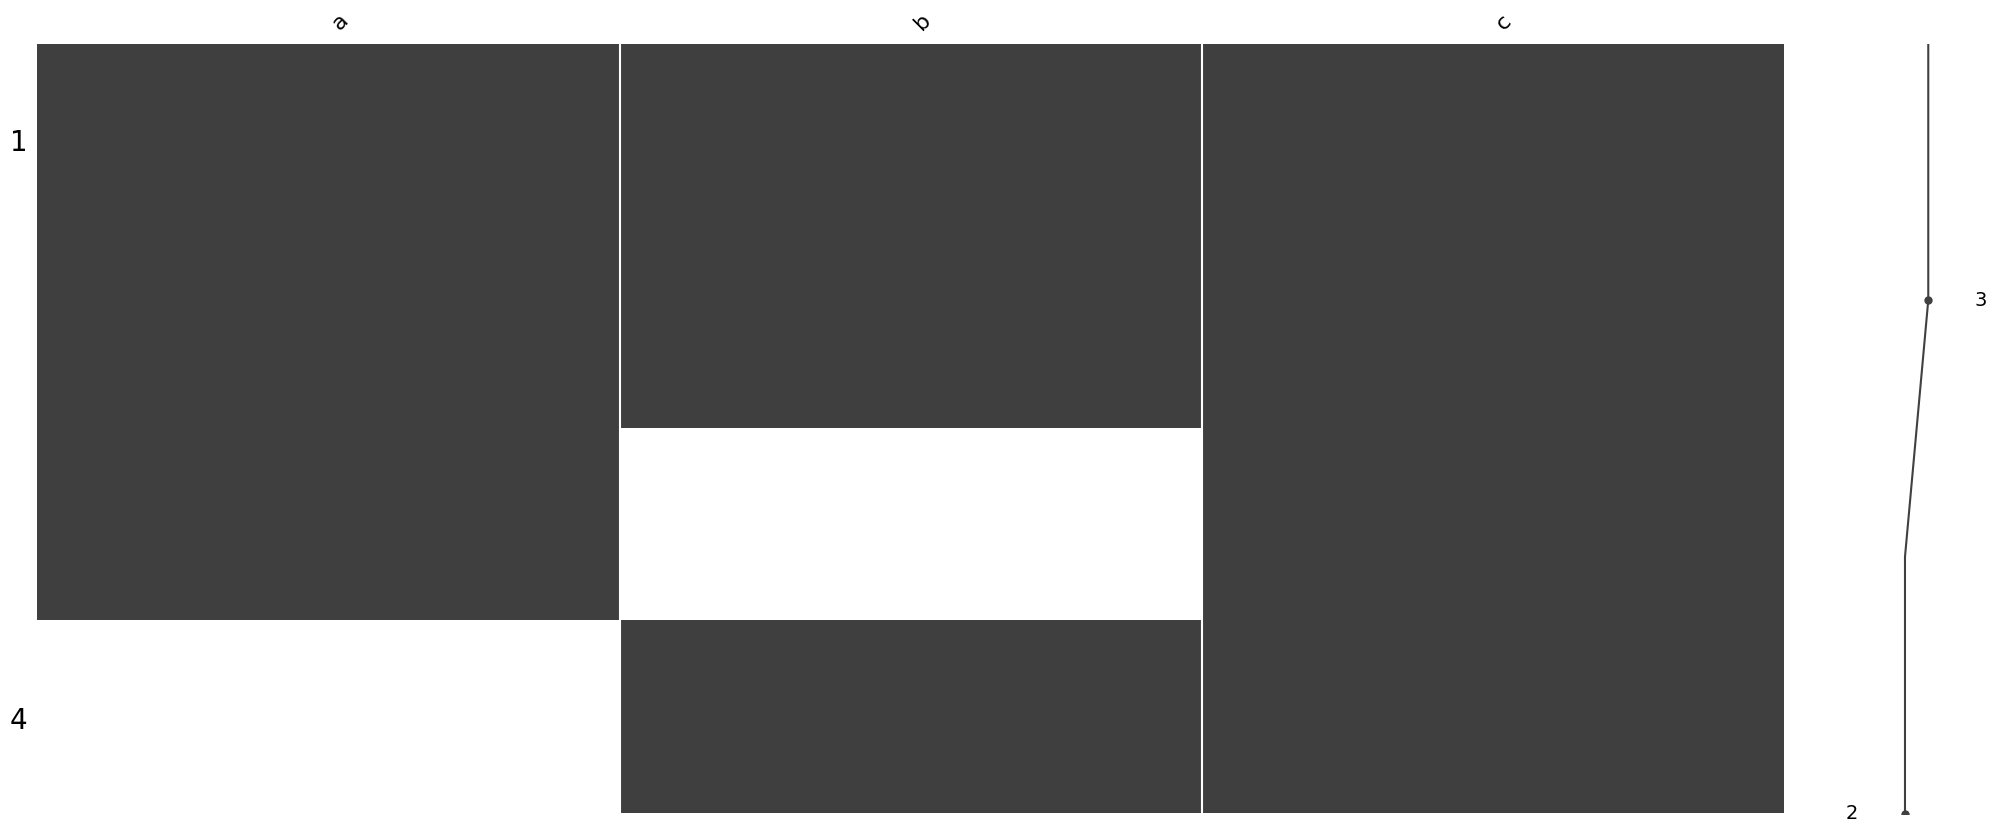

In [109]:
import missingno as msno # again, violates PEP-8
msno.matrix(df_missing)

We can use the `isna()` method to check for missing values.

In [110]:
df_missing.isna()

,a,b,c
0,False,False,False
1,False,False,False
2,False,True,False
3,True,False,False


and we can use the sum method to count the number of missing values in each column:

In [111]:
df_missing.isna().sum()

a    1
b    1
c    0
dtype: int64

In [112]:
df_missing.dropna(how='any') # drop rows with any missing values

,a,b,c
0,1.0,2.0,1
1,2.0,3.0,2


In [113]:
df_missing.dropna(axis=1, how='any') # drop columns with any missing values

,c
0,1
1,2
2,3
3,4


In [114]:
# add a new column consisting of missing values
df_missing['d'] = np.nan
df_missing

,a,b,c,d
0,1.0,2.0,1,NaN
1,2.0,3.0,2,NaN
2,3.0,NaN,3,NaN
3,NaN,5.0,4,NaN


In [115]:
df_missing.dropna(axis=1, how='all') # drop columns where all values are NaN

,a,b,c
0,1.0,2.0,1
1,2.0,3.0,2
2,3.0,NaN,3
3,NaN,5.0,4


In [116]:
# drop rows that have missing values for column 'b'
df_missing.dropna(subset=['b'])

,a,b,c,d
0,1.0,2.0,1,NaN
1,2.0,3.0,2,NaN
3,NaN,5.0,4,NaN


### Filling in missing values
Sometimes, you don't want to drop missing values, but rather fill them in with some other value.  For example, you might want to fill in missing values with a scalar value, or perhaps with the mean or median of the column.  You can do that using the `fillna()` method.

```
df.fillna(0) # fill in missing values with 0
```

```
df.fillna(df.mean()) # fill in missing values with the mean of the column
```

```
df.fillna(df.median()) # fill in missing values with the median of the column
```

In [117]:
df_missing.fillna(0) # fill missing values with 0

,a,b,c,d
0,1.0,2.0,1,0.0
1,2.0,3.0,2,0.0
2,3.0,0.0,3,0.0
3,0.0,5.0,4,0.0


A slightly different approach, and one that's often used in time series analysis, is to fill in missing values with the last known value.  You can do that using the `ffill` method.

```
df_missing.fillna(method='ffill')
```
and its counterpart, `bfill`

```
df_missing.fillna(method='bfill')
```

### Setting and resetting indexes

Let's say we wanted to use the `names` column as the index for our DataFrame.  We can do that using the `set_index()` method.

```
df.set_index('names')
```

Note that the `set_index()` method returns a new DataFrame.  It does not modify the original DataFrame.  If we want to modify the original DataFrame, we need to use the `inplace=True` argument.

```
df.set_index('names', inplace=True)
```

We can also reset the index (to move the index back into the DataFrame as a column) using the `reset_index()` method.

```
df.reset_index()
```

We'll use indexes in the next section when we talk about selecting rows and columns.

### Filtering rows

First, let's set the index to be the `names` column.

```
df.set_index('names', inplace=True)
```

The .loc and .iloc indexers are used to select rows and columns from a DataFrame.  The .loc indexer selects rows and columns based on the labels of the rows and columns.  The .iloc indexer selects rows and columns based on the position of the rows and columns.

Let's say we wanted to select the row with the label 'one'.  We can do that using the .loc indexer.

```
df.loc['one']
```

The .iloc indexer works the same way, but uses the position of the row instead of the label of the row.

```
df.iloc[0]
```

#### Boolean filtering (IMPORTANT)

Let's say we wanted to select only the rows where the value in the `numbers` column is greater than 3.  We can do that using a boolean expression.

```
df[df.numbers > 3]
```

We can also use the `isin()` method to select rows where the value in the `names` column is in a list of values.

```
df[df.names.isin(['one', 'two', 'three'])]
```

We can also use the `between()` method to select rows where the value in the `numbers` column is between two values.

```
df[df.numbers.between(2, 4)]
```

We can also use the `str.contains()` method to select rows where the value in the `names` column contains a particular string.

```
df[df.names.str.contains('o')]
```

Finally, pandas provides the `query()` method, which allows us to use SQL-like syntax to select rows.

```
df.query('numbers > 3')
```


### Sorting rows

Let's say we wanted to sort the rows in our DataFrame by the values in the `numbers` column.  We can do that using the `sort_values()` method.

```
df.sort_values('numbers')
```

By default, the `sort_values()` method sorts in ascending order.  We can sort in descending order by setting the `ascending` argument to `False`.

```
df.sort_values('numbers', ascending=False)
```

We can also sort by the index using the `sort_index()` method.

```
df.sort_index()
```


### Grouping rows

Let's say we wanted to group the rows in our DataFrame by the values in the `numbers` column.  We can do that using the `groupby()` method.

```
df.groupby('numbers')
```

By itself, the `groupby()` method doesn't do much.  It just creates a `DataFrameGroupBy` object.  We need to apply an aggregation function to the `DataFrameGroupBy` object to get anything useful.  For example, we can get the mean of each group using the `mean()` method.

```
df.groupby('numbers').mean()
```

We can also apply multiple aggregation functions to the `DataFrameGroupBy` object using the `agg()` method.

```
df.groupby('numbers').agg(['mean', 'median'])
```


### Basic Plots

pandas provides some basic plotting functionality.  We'll use the `plot()` method to create plots.  The `plot()` method takes a `kind` argument that specifies the type of plot to create.  The default is a line plot.

For example, generate a histogram of the Age column, filtering out any values that are less than 15 or greater than 100.

```
df[(df.Age < 100) & (df.Age > 15)].Age.plot.hist()
```

Another example: generate a bar chart of the output from `value_counts()` of the `benefits` column.

```
df.benefits.value_counts().plot.bar()
```



## Break (10 minutes)

## Hands-on Coding (25 minutes)

From https://www.kaggle.com/osmi/mental-health-in-tech-survey


### Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

### Metadata
|Field|Description|
|:----|:----|
|**Timestamp**|
|**Age**| 
|**Gender**
|**Country**
|**state**| If you live in the United States, which state or territory do you live in?
|**self_employed**| Are you self-employed?
|**family_history**| Do you have a family history of mental illness?
|**treatment**| Have you sought treatment for a mental health condition?
|**work_interfere**| If you have a mental health condition, do you feel that it interferes with your work?
|**no_employees**| How many employees does your company or organization have?
|**remote_work**| Do you work remotely (outside of an office) at least 50% of the time?
|**tech_company**| Is your employer primarily a tech company/organization?
|**benefits**| Does your employer provide mental health benefits?
|**care_options**| Do you know the options for mental health care your employer provides?
|**wellness_program**| Has your employer ever discussed mental health as part of an employee wellness program?
|**seek_help**| Does your employer provide resources to learn more about mental health issues and how to seek help?
|**anonymity**| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
|**leave**| How easy is it for you to take medical leave for a mental health condition?
|**mental_health_consequence**| Do you think that discussing a mental health issue with your employer would have negative consequences?
|**phys_health_consequence**| Do you think that discussing a physical health issue with your employer would have negative consequences?
|**coworkers**| Would you be willing to discuss a mental health issue with your coworkers?
|**supervisor**| Would you be willing to discuss a mental health issue with your direct supervisor(s)?
|**mental_health_interview**| Would you bring up a mental health issue with a potential employer in an interview?
|**phys_health_interview**| Would you bring up a physical health issue with a potential employer in an interview?
|**mental_vs_physical**| Do you feel that your employer takes mental health as seriously as physical health?
|**obs_consequence**| Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
|**comments**| Any additional notes or comments



Then read the CSV file into a DataFrame:

NOTE: MacOS users may need to run the Install Certificates.command script located in the Python 3 folder in order to avoid SSL errors when using the requests library.

In [118]:
df = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/survey.csv")

It's common to look at the resulting DataFrame using .head()

In [119]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


If you want to look at a random sample, you can use .sample()

In [120]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
727,2014-08-28 10:22:06,30,Male,Switzerland,NaN,No,Yes,Yes,Sometimes,26-100,...,Very difficult,Yes,Yes,No,No,No,No,No,No,NaN
479,2014-08-27 16:17:05,30,female,United States,NY,No,No,No,NaN,100-500,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
240,2014-08-27 13:31:35,22,Male,Sweden,NaN,No,No,No,NaN,6-25,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,No,No,NaN
422,2014-08-27 15:32:43,28,Male,New Zealand,NaN,No,Yes,Yes,Sometimes,6-25,...,Very easy,No,No,Yes,Yes,Yes,Yes,Yes,No,NaN
49,2014-08-27 11:44:43,30,male,United States,IL,No,Yes,Yes,Rarely,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...


Finally, you can get some basic information about the size and shape of the DataFrame:

In [121]:
print("The number of rows of the dataset is: ", len(df))
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

The number of rows of the dataset is:  1259
The number of columns of the dataset is:  27
The shape of the dataset is:  (1259, 27)


You can list the columns:


In [122]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

And you can extract one or more columns.  The following pair of 
commands do exactly the same thing:

In [123]:
print(df['Country'])

0        United States
1        United States
2               Canada
3       United Kingdom
4        United States
             ...      
1254    United Kingdom
1255     United States
1256     United States
1257     United States
1258     United States
Name: Country, Length: 1259, dtype: object


In [124]:
country_state = df[['Country', 'state']]
country_state.head()

,Country,state
0,United States,IL
1,United States,IN
2,Canada,NaN
3,United Kingdom,NaN
4,United States,TX


In [125]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [126]:
df.loc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [127]:
df_gender = df.set_index('Gender')

In [128]:
df_gender.loc['Female']

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Gender,,,,,,,,,,,,,,,,,,,,,
Female,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
Female,2014-08-27 11:31:50,35,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
Female,2014-08-27 11:32:39,42,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
Female,2014-08-27 11:37:59,35,United States,CA,No,Yes,Yes,Rarely,6-25,Yes,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
Female,2014-08-27 11:43:36,38,United States,TX,No,Yes,Yes,Sometimes,26-100,No,...,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Female,2015-02-21 05:11:37,28,United States,TX,No,No,Yes,Rarely,6-25,No,...,Somewhat easy,Yes,Yes,Some of them,No,No,No,No,Yes,NaN
Female,2015-02-21 09:18:20,34,United Kingdom,NaN,No,No,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Maybe,Maybe,Some of them,Yes,No,Maybe,No,Yes,NaN
Female,2015-02-21 18:54:12,32,Ireland,NaN,No,Yes,No,Never,More than 1000,No,...,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,NaN


Let's see what the possible values of the 'Country' column are:

In [129]:
df['Country'].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

Let's do some boolean filtering:

Let's say we wanted to select only the rows where the value in the `Country` column is "United States".

```
df[df.Country == 'United States']
```



Let's do some basic data cleaning.  First, let's examine the `Age` column.

```
df.Age
```
Do you see anything strange?  Let's look at the minimum and maximum values.

```
df.Age.min()
```

```
df.Age.max()
```

Let's say we wanted to replace all of the values in the `Age` column that are greater than 100 with the median age.  We can do that using the `where()` method.

```
df.Age.where(df.Age > 100, df.Age.median())
```


#### Challenge: 
Use the `where()` method to replace all of the values in the `Age` column that are less than 16 with the median age.


In [130]:
# replace all of the values in Age column that Age < 16 with the median

df.Age.where(df.Age >= 16, df.Age.median())

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

Example: Find people who reported a family history of mental health conditions.
Look at the data description above, and you'll see that we can use the `family_history` column to find people who reported a family history of mental health conditions.

```
df.family_history
```

In [131]:
# get a sense of the distribution of the values in the family_history column
df.family_history.value_counts()

family_history
No     767
Yes    492
Name: count, dtype: int64

In [132]:
# do the filtering
df_family_history = df[df.family_history == 'Yes']
df_family_history.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN


You can use a simple expression like `df.family_history == 'Yes'` to find people who reported a family history of mental health conditions, but you can also use more complex expressions.  For example, to find people who reported a family history of mental health conditions and are between the ages of 20 and 30, you could use the following expression:

```
df[(df.family_history == 'Yes') & (df.Age.between(20, 30))]
```


In [133]:
df[(df.family_history == 'Yes') & (df.Age.between(20, 30))]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
20,2014-08-27 11:35:12,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,NaN
32,2014-08-27 11:39:31,30,male,United Kingdom,NaN,No,Yes,Yes,Sometimes,500-1000,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Don't know,No,NaN
42,2014-08-27 11:43:07,27,Male,Canada,NaN,No,Yes,Yes,Sometimes,1-5,...,Very difficult,Maybe,No,Some of them,No,No,No,Yes,No,NaN
49,2014-08-27 11:44:43,30,male,United States,IL,No,Yes,Yes,Rarely,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2015-05-06 10:14:50,22,Male,Australia,NaN,No,Yes,Yes,Often,100-500,...,Don't know,Maybe,Maybe,No,Yes,No,Maybe,Don't know,Yes,In australia all organisations of a certain si...
1249,2015-07-22 18:57:54,30,M,United States,CA,No,Yes,Yes,Sometimes,26-100,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN


Be careful to always look at the possible values of a column before you do any filtering.  For example, let's say that we wanted to extract the rows corresponding to 
individuals who are willing to discuss a mental health issue with their coworkers.  We might try the following:

```
df[df.coworkers == 'Yes']
```

However, if we look at the possible values of the `coworkers` column, we'll see that there are actually three possible values: `Yes`, `No`, and `Some of them`.  So we need to modify our expression to take that into consideration.


In [134]:
df.coworkers.value_counts()

coworkers
Some of them    774
No              260
Yes             225
Name: count, dtype: int64

#### Challenge: 
Report how many people are willing to discuss a mental health issue with their coworkers?

In [135]:
len(df[(df.coworkers == 'Some of them') | (df.coworkers == 'Yes')])

999

#### Challenge:

What is the mean age of respondents?

In [136]:
df.Age.mean()


np.float64(79428148.31135821)

Does that look right?  What's going on? Can you fix it?

In [137]:
df.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

It seems that there are bunch of negative values and very large values that are abnormal for an age of a human. I plan to drop those values and check again.

In [138]:
df.Age.where((df.Age>=0) & (df.Age <= 150), np.nan).mean()

np.float64(32.01913875598086)

#### Challenge:
Use a better method to report the "expected" value of the `Age` column. (Hint: consider other measures of central tendency.)

In [139]:
df.Age.median()

np.float64(31.0)

#### Challenge:
What are the unique values of the `Gender` column?

In [140]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

#### Challenge:
Describe (using a markdown block that you insert below) how, if at all, you would clean the `Gender` column, implement your solution (using a code block that you insert below), and comment on any bias that might be introduced by your implementation (again, by inserting a markdown block below your code).

There are many values that are non-binary genders. There are also many typos and unspecified values. I will limit the values of gender to [Female, Male, Other] and group them accordingly.

In [141]:
gender_mapping = {
    'female': 'Female',
    'femake': 'Female',
    'Female (cis)': 'Female',
    'cis-female/femme': 'Female',
    'f': 'Female',
    'woman': 'Female',
    'women': 'Female',
    'male': 'Male',
    'make': 'Male',
    'msle': 'Male',
    'male (cis)': 'Male',
    'mal': 'Male',
    'mail': 'Male',
    'cis male': 'Male',
    'cis man': 'Male',
    'maile': 'Male',
    'male-ish': 'Male',
    'm' : "Male",
    'man': 'Male',
    'men': 'Male',
    'malr': 'Male',
    'cis female': 'Female',
    'non-binary': 'Other',
    'trans': 'Other',
    'transgender': 'Other',
    'genderqueer': 'Other',
    'agender': 'Other',
    'genderfluid': 'Other',
    'other': 'Other'
}   # Create the mapping dictionary of the gender values to [Female, Male, Other]
df['Gender_Cleaned'] = df['Gender'].str.strip().str.lower().map(gender_mapping) # clean the gender values by stripping, lowercasing and mapping 
df['Gender_Cleaned'].where(df['Gender_Cleaned'].isin(['Female', 'Male']), 'Other', inplace=True) # replace the other gender values to 'Other'

df['Gender_Cleaned'].unique()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_33980\495241985.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender_Cleaned'].where(df['Gender_Cleaned'].isin(['Female', 'Male']), 'Other', inplace=True) # replace the other gender values to 'Other'


array(['Female', 'Male', 'Other'], dtype=object)

In this way we are categorizing some of the non-binary gender, e.g. queer, to "Other" which I think is not so ideal. We will lose some features of the gender data. But for now, this is the best I can achieve.

#### Challenge:
Find the unique categories of no_employees. What is the frequency of each category?

In [142]:
df.no_employees.value_counts()

no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64

### Aggregating data

Example: Find the number of respondents from each state.
```
df.state.value_counts()
```

Alternatively, we could use the `groupby()` method to group the rows by state and then use the `size()` method to get the size of each group.

```
df.groupby('state').size()
```


## Application of Concepts (30 minutes)

Exploration of Movie Titles and Movie Cast

We're going to use two datasets from the Internet Movie Database (IMDb) to explore movie titles and movie cast.  The first dataset contains information about movies, including the title, year of release, and genre(s).  The second dataset contains information about the cast of each movie, including the name of the actor/actress, the character they played, and the billing position (i.e., the order in which they were listed in the credits).

We're going to load them via URLs, but you can also download them and load them from your local machine.  Note that if you get a weird "certificate error" or "SSL error", you'll need to follow the instructions from last class to fix it (i.e. click on "Install Certificates.command" in the Finder); alternatively you can use `%pip install certifi` in a new code block below.


In [143]:
titles = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/titles.csv', index_col=None)
cast = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/cast.zip', index_col=None)

#### Challenge:
Show the first 3 lines of both the titles and the cast DataFrames.

In [144]:
# list the first 3 rows of titles DataFrame
titles.head(3)

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993


In [145]:
# list the first 3 rows of cast DataFrame
cast.head(3)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


#### Challenge:
How many movies are listed in the titles DataFrame?

In [146]:
# count the movies in titles Dataframe
len(titles)

232330

#### Challenge:
What are the earliest two films listed in the titles DataFrame?

In [147]:
# list the earliest two films in titles DataFrame
titles.sort_values('year').head(2)

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898


#### Challenge:
How many movies have the title "Hamlet"?

In [148]:
# count the movies with the title "Hamlet" in titles DataFrame
len(titles[titles.title == "Hamlet"])

18

#### Challenge:
List all of the "Treasure Island" movies from earliest to most recent.

In [149]:
# list the "Treasure Island" movies from earliest to most recent in titles DataFrame
titles[titles.title == "Treasure Island"].sort_values('year')

,title,year
206027,Treasure Island,1918
51287,Treasure Island,1920
191050,Treasure Island,1934
96934,Treasure Island,1950
89534,Treasure Island,1972
111343,Treasure Island,1973
205397,Treasure Island,1985
179354,Treasure Island,1999


#### Challenge:
What are the 10 most common movie names of all time?

In [150]:
# list the 10 most common movie names of all time in titles DataFrame
titles.title.value_counts().head(10)

title
Hamlet                  18
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
Kismet                  11
Othello                 11
Freedom                 11
The Three Musketeers    11
Temptation              11
Name: count, dtype: int64

#### Challenge:
Who are the 10 people most often credited as "Herself" in film history?

In [151]:
# list the 10 people most often played as "Herself" in the cast DataFrame
cast[cast.character == 'Herself'].name.value_counts().head(10)

name
Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      8
Hillary Clinton        7
Mary Jo Pehl           7
Sumie Sakai            6
Joan Rivers            6
Caroline Rhea          5
Marilyn Monroe         5
Kareena Kapoor         5
Name: count, dtype: int64

#### Challenge:
What are the 10 most frequent roles that start with the word "Science"?


In [152]:
# list the 10 most frequent roles that start with the word "Science"  
cast[cast.character.str.startswith('Science') & (cast.character != np.nan)].character.value_counts().head(10) # Filter out the nan in character column

character
Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Kid              5
Science Reporter         5
Science Promo Cadet      5
Science Club Member      5
Science                  4
Science teacher          3
Name: count, dtype: int64